In [2]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score,  RandomizedSearchCV
from sklearn.pipeline import Pipeline

from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [439]:
data=pd.read_csv('data_CVD.csv') #Import Data

X = data.drop('cardio',axis=1) # Features

y= data.cardio # Target


In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100) 

In [441]:
rfc = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=10, n_estimators=1000)

In [442]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=1000)

In [443]:
#Apply model hyperparameters into the test features
Predictions = rfc.predict(X_test)

In [444]:
Predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [445]:
print(f"Accuray on test set:{round(rfc.score(X_test,y_test),2)}")
# round(accuracy_score(y_test1, y_pred1),2) you get the same value using this agorithm for accuracy

Accuray on test set:0.73


In [446]:
confusion_matrix(y_test, Predictions)

array([[8234, 2306],
       [3276, 7177]], dtype=int64)

In [457]:
cm1=confusion_matrix(y_test, Predictions)

In [458]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, Predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,Predictions))
print('\n')

=== Confusion Matrix ===
[[8234 2306]
 [3276 7177]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10540
           1       0.76      0.69      0.72     10453

    accuracy                           0.73     20993
   macro avg       0.74      0.73      0.73     20993
weighted avg       0.74      0.73      0.73     20993





In [ ]:
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 

In [448]:
rfc_hp = roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])
fpr_hp, tpr_hp, thresholds_hpc = roc_curve(y_test,rfc.predict_proba(X_test)[:,1])

In [474]:
from numpy import sqrt
from numpy import argmax
gmeans = sqrt(tpr_hp * (1-fpr_hp))
ix = argmax(gmeans)
print (thresholds_hpc[ix], gmeans[ix])

0.4751926561873504 0.7343921103138005


In [1]:
J = tpr_hp - fpr_hp
ix = argmax(J)
best_thresh = thresholds_hpc[ix]
print('Best Threshold=%f' % (best_thresh))

NameError: name 'tpr_hp' is not defined

In [578]:
#Best Threshold
max(J)

0.4694495066105061

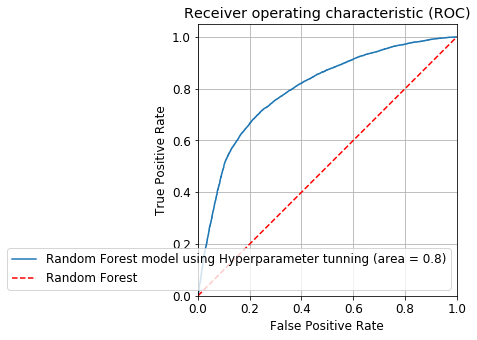

In [449]:
fig,ax = plt.subplots(figsize=(5,5))
ax.set_aspect("equal")
ax.plot(fpr_hp, tpr_hp,
         label=f'Random Forest model using Hyperparameter tunning (area = {round(rfc_hp,2)})')
plt.plot([0, 1], [0, 1],'r--', label="Random Forest")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('RPC_CURVE_12062020')
plt.show()

In [450]:
y_predic_proba=rfc.predict_proba(X_test)
y_predic_proba


array([[0.50367888, 0.49632112],
       [0.76791173, 0.23208827],
       [0.17619824, 0.82380176],
       ...,
       [0.59840965, 0.40159035],
       [0.87539751, 0.12460249],
       [0.63336145, 0.36663855]])

In [61]:
len(y_predic_proba)

20993

In [59]:
Prob_sum=np.sum(y_predic_proba,1)
Prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [60]:
Prob_sum.shape

(20993,)

In [62]:
np.unique(Prob_sum)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [451]:
pos_proba=y_predic_proba[:,1]
pos_proba

array([0.49632112, 0.23208827, 0.82380176, ..., 0.40159035, 0.12460249,
       0.36663855])

In [452]:
y_test

68285    1
54030    1
32306    1
65518    1
26317    0
        ..
57529    1
30331    1
37688    0
49779    0
1264     1
Name: cardio, Length: 20993, dtype: int64

(0, 1)

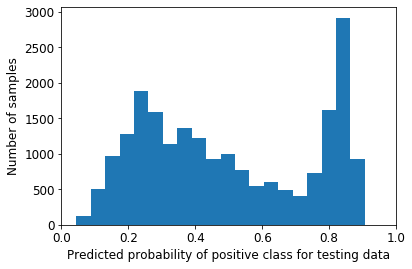

In [453]:
mpl.rcParams['font.size'] =12
plt.hist(pos_proba,bins=20)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')
plt.xlim(0,1)

In [454]:
pos_sample_pos_proba=pos_proba[y_test==1]
neg_sample_pos_proba=pos_proba[y_test==0]


In [456]:
len(pos_sample_pos_proba)

10453

(0, 1)

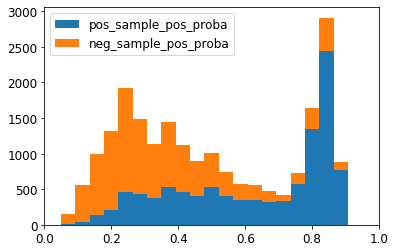

In [365]:
plt.hist([pos_sample_pos_proba,neg_sample_pos_proba],bins=20,histtype='barstacked')
plt.legend(['pos_sample_pos_proba','neg_sample_pos_proba'])
plt.xlim(0,1)

Activity based on the book : https://books.google.com.mx/books?id=XzCWDwAAQBAJ&pg=PA99&lpg=PA99&dq=Histograms+of+Predicted+Probabilities+of+the+True+Positives+and+True+Negatives+of+the+Model+python&source=bl&ots=Yk_OK7Q3Po&sig=ACfU3U2bJpXkI9q8fMcAt0U88yOdqdAZZw&hl=es&sa=X&ved=2ahUKEwiF7YepiP3pAhUXK80KHZ78AmMQ6AEwCXoECAgQAQ#v=onepage&q=Histograms%20of%20Predicted%20Probabilities%20of%20the%20True%20Positives%20and%20True%20Negatives%20of%20the%20Model%20python&f=false
        
  Data Science Projects with Python: A case study approach to successful data

Text(0, 0.5, 'Frecuency')

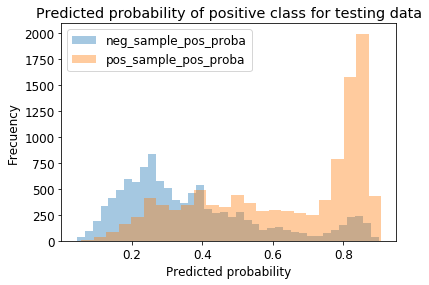

In [455]:
sns.distplot(neg_sample_pos_proba,  kde=False, label='neg_sample_pos_proba')


sns.distplot(pos_sample_pos_proba,  kde=False,label='pos_sample_pos_proba')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Predicted probability of positive class for testing data')
plt.xlabel('Predicted probability')
plt.ylabel('Frecuency')


Calibration

In [106]:
from sklearn.calibration import calibration_curve

In [113]:
rf_yc, rf_c = calibration_curve(y_test, pos_proba, n_bins=40)

In [114]:
[rf_yc,  rf_c]

[array([0.        , 0.01666667, 0.05797101, 0.08307692, 0.08752735,
        0.15955766, 0.14099217, 0.18263091, 0.22679426, 0.26202322,
        0.3       , 0.2928475 , 0.34710744, 0.35595568, 0.38392857,
        0.41611842, 0.43378119, 0.42504744, 0.50363636, 0.54368932,
        0.53273138, 0.59888579, 0.60559006, 0.5890411 , 0.6503268 ,
        0.65263158, 0.70428016, 0.79324895, 0.78666667, 0.78632479,
        0.81904762, 0.81031614, 0.83790226, 0.86013072, 0.87052342,
        0.75      ]),
 array([0.04941572, 0.06507989, 0.08960349, 0.11361828, 0.13759793,
        0.16290277, 0.18767188, 0.2126543 , 0.23758518, 0.26168099,
        0.28657949, 0.31223465, 0.33752446, 0.36354883, 0.38808495,
        0.41263025, 0.43730514, 0.46237913, 0.48779262, 0.51246467,
        0.53703152, 0.56212094, 0.58737617, 0.61230677, 0.6367547 ,
        0.6627088 , 0.68673624, 0.71145019, 0.73823707, 0.76321115,
        0.78837414, 0.8138064 , 0.83779283, 0.86102278, 0.88236304,
        0.90317691])]

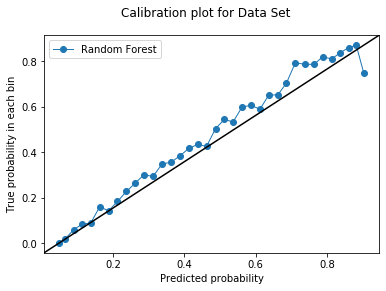

In [115]:
%matplotlib inline
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()


plt.plot(rf_c, rf_yc, marker='o', linewidth=1, label='Random Forest')


line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Data Set')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

In [128]:
def bin_total(y_true, y_prob, n_bins):
    bins = np.linspace(0., 1. + 1e-8, n_bins + 1)

    # In sklearn.calibration.calibration_curve,
    # the last value in the array is always 0.
    binids = np.digitize(y_prob, bins) - 1

    return np.bincount(binids, minlength=len(bins))


bin_total(y_test, pos_proba, n_bins=30)

array([   0,   35,  165,  472,  714,  995, 1136, 1555, 1163,  952,  817,
       1307,  779,  703,  724,  775,  530,  437,  472,  386,  355,  326,
        496,  918, 1745, 2288,  740,    8,    0,    0,    0], dtype=int64)

Setting a new threshold 

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

In [548]:
pos_proba

array([0.49632112, 0.23208827, 0.82380176, ..., 0.40159035, 0.12460249,
       0.36663855])

In [556]:
threshold =0.475193

In [557]:
y_test_predictions_high_precision = pos_proba >= threshold

In [558]:
predicted_new_threshold = (pos_proba> threshold).astype('int')

In [559]:
y_test_predictions_high_precision

array([ True, False,  True, ..., False, False, False])

In [560]:
accuracy = accuracy_score(y_test, y_test_predictions_high_precision )

In [561]:
accuracy

0.734768732434621

In [562]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predicted_new_threshold))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,predicted_new_threshold))
print('\n')

=== Confusion Matrix ===
[[7977 2563]
 [3005 7448]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.73      0.76      0.74     10540
           1       0.74      0.71      0.73     10453

    accuracy                           0.73     20993
   macro avg       0.74      0.73      0.73     20993
weighted avg       0.74      0.73      0.73     20993





In [549]:
print(f1_score(y_test, predicted_new_threshold))

0.7390342314200182


In [554]:
pos_sample_pos_proba_2=predicted_new_threshold[y_test==1]
neg_sample_pos_proba_2=predicted_new_threshold[y_test==0]


Text(0, 0.5, 'Frecuency')

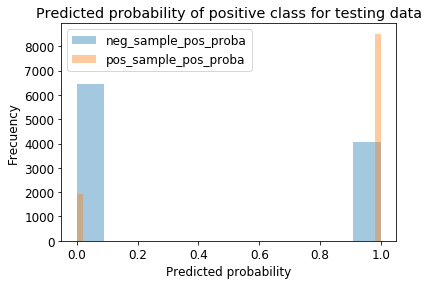

In [555]:
sns.distplot(neg_sample_pos_proba_2,  kde=False, label='neg_sample_pos_proba')


sns.distplot(pos_sample_pos_proba_2,  kde=False,label='pos_sample_pos_proba')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Predicted probability of positive class for testing data')
plt.xlabel('Predicted probability')
plt.ylabel('Frecuency')


In [256]:
len(pos_sample_pos_proba_2)

10453